In [2]:
from qubit_zz_coupling.utils import exp_decay, ramsey, make_population
from qubit_zz_coupling.core import setup_operators, solve_t1, solve_t2, make_population, plot_t1, plot_t2

from qutip import basis, tensor, sigmaz, sigmax, sigmay, sigmam, mesolve, identity, Qobj, destroy, qeye, Bloch, about
import matplotlib.pyplot as plt
import numpy as np
from scipy.optimize import curve_fit
from qtt.algorithms.functions import fit_gauss_ramsey

In [3]:
start_t = 0
end_t = 300 # micro sec
sample = 2.5 # in Ghz

fq = 3.0
t1 = 100
t2 = 50

sz_q = sigmaz()
sm_q = sigmam()
n = sm_q.dag()*sm_q

H = 2 * np.pi * fq / 2 * sz_q

gamma_phi=1/t2-1/2/t1 #pure dephasing constant

c_ops = [
        np.sqrt(1/t1) * sm_q,
        np.sqrt(gamma_phi/2)* sz_q,
    ]

751
[9.99999430e-01 1.00000007e+02 4.04722626e-07]


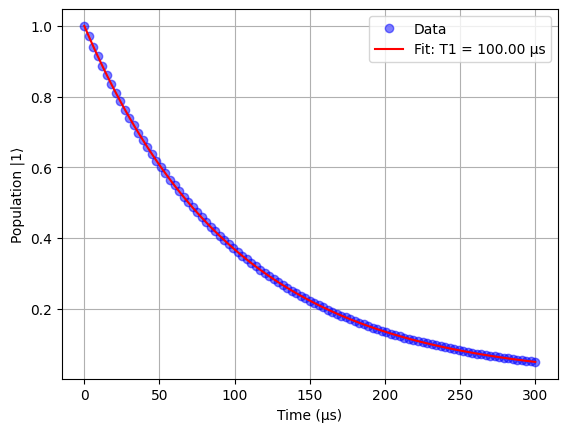

In [9]:
s = int((end_t-start_t)*sample)+1

#tlist = np.linspace(start_t, end_t, s)  # Time points in μs
tlist = np.linspace(0,300,101)  # Time points in μs

print(s)
# T1 measurement for Qubit 1 
psi0 = basis(2,0)

fit_par, pop = solve_t1(H, psi0, tlist, c_ops, [sz_q], ret_pop=True)

print(fit_par)
fig, ax = plt.subplots()
ax.plot(tlist, pop, 'bo', alpha=0.5, label='Data')
ax.plot(tlist, exp_decay(tlist, *fit_par), 'r-', label=f'Fit: T1 = {fit_par[1]:.2f} μs')
#ax.set_title(f'T2 - {label_Qbit} (JTLS = {system_params["JTLS"]}, Jzz = {system_params["Jzz"]}, Jxx = {system_params["Jxx"]})')
ax.set_xlabel('Time (μs)')
ax.set_ylabel('Population |1⟩')
ax.legend()
ax.grid(True)


# T2 test

[  0.25 100.     0.5 ]


TypeError: ramsey() missing 2 required positional arguments: 'phi' and 'C'

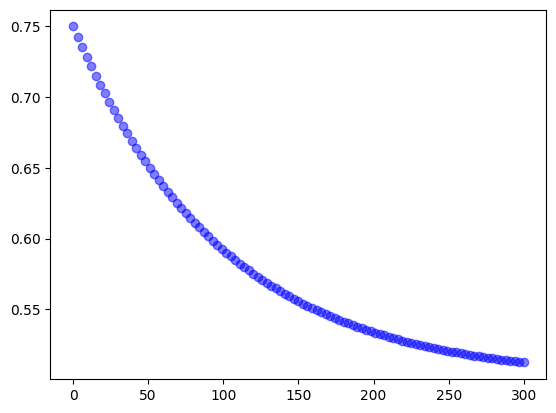

In [12]:
# T1 measurement for Qubit 1 
psi0 = (basis(2,0)+basis(2,1)).unit()

first_guess = [0.5, t2, fq, 0.0, 0.5]
#res = mesolve(H, psi0, tlist, c_ops, [n], options=None, progress_bar=False)
#pop = make_population(res.expect[0])
#fit_par, pop = solve_t1(H, psi0, tlist, c_ops, [n], first_guess=first_guess, ret_pop=True)
fit_par, pop = solve_t1(H, psi0, tlist, c_ops, [n], ret_pop=True)

#fit_par, pop = plot_t2(H, psi0, tlist, c_ops, [n], first_guess=first_guess, use_fit_gauss=True)

print(fit_par)
fig, ax = plt.subplots()
ax.plot(tlist, pop, 'bo', alpha=0.5, label='Data')
ax.plot(np.linspace(start_t, end_t, 500) , ramsey(np.linspace(start_t, end_t, 500), *fit_par), 'r', label=f'Fit: T2 = {fit_par[1]:.2f} μs, f = {fit_par[2]}')
#ax.set_title(f'T2 - {label_Qbit} (JTLS = {system_params["JTLS"]}, Jzz = {system_params["Jzz"]}, Jxx = {system_params["Jxx"]})')
ax.set_xlabel('Time (μs)')
ax.set_ylabel('Population |1⟩')
ax.legend()
ax.grid(True)

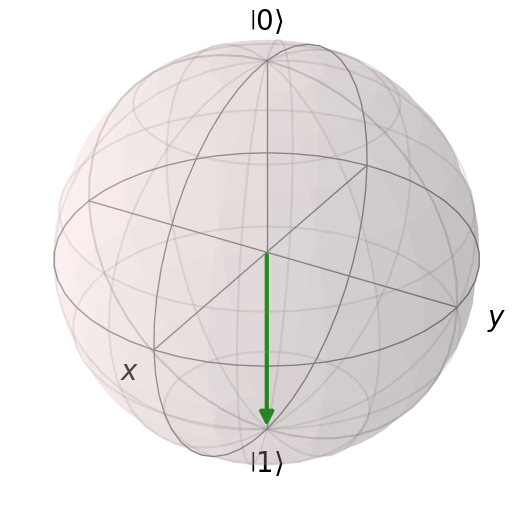

In [90]:
psi0 = basis(2,1)
# Create Bloch sphere plot
sphere = Bloch()
sphere.add_states(psi0)
sphere.show()

In [ ]:
n = tensor(sigmam().dag()*sigmam(), identity(2), identity(2))